In [1]:
# Librerias estándar
import json
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

# Scikit-learn - Preprocesamiento
from sklearn.preprocessing import OneHotEncoder

# Scikit-learn - Modelos
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Scikit-learn - Division de datos
from sklearn.model_selection import train_test_split

# Scikit-learn - Metricas
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error, mean_absolute_error


In [2]:
df = pd.read_csv('../data/INvideos_cc50_202101.csv')

C:\Users\smith\AppData\Local\Temp\ipykernel_19848\1176321197.py:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/INvideos_cc50_202101.csv')


In [3]:
with open("../data/IN_category_id.json") as f:
    categorias = json.load(f)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [5]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)


In [6]:
df.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


In [7]:
df.shape

(38533, 20)

## Exploracion

In [8]:
df.isnull().sum()

video_id                     5
trending_date              916
title                      998
channel_title             1111
category_id               1144
publish_time              1157
tags                      1169
views                     1176
likes                     1181
dislikes                  1181
comment_count             1181
thumbnail_link            1181
comments_disabled         1181
ratings_disabled          1181
video_error_or_removed    1181
description               1742
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

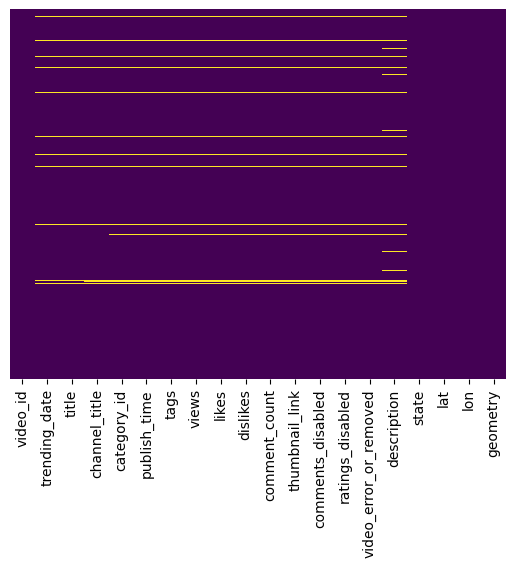

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

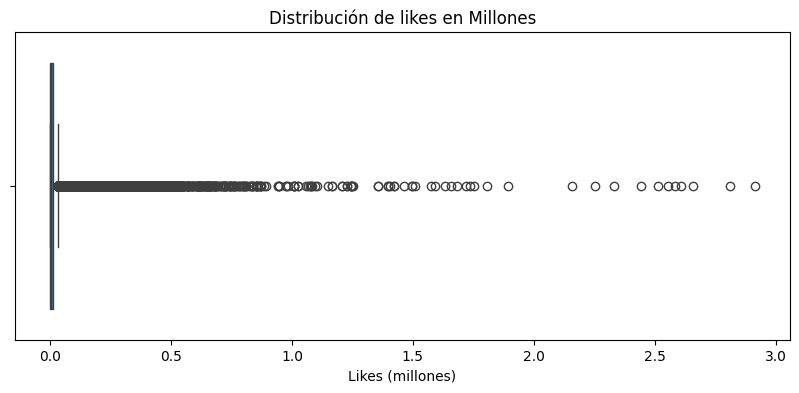

In [10]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['likes'] / 1000000)
plt.xlabel('Likes (millones)')
plt.title('Distribución de likes en Millones')  
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

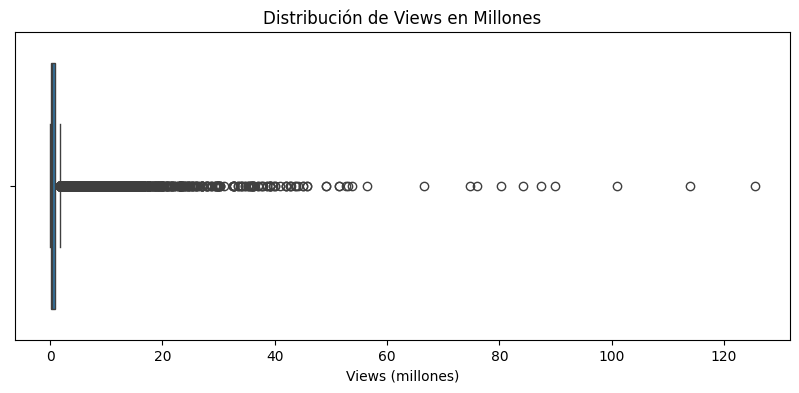

In [12]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=pd.to_numeric(df['views'], errors='coerce') / 1_000_000)
plt.xlabel('Views (millones)')
plt.title('Distribución de Views en Millones')  
plt.show()

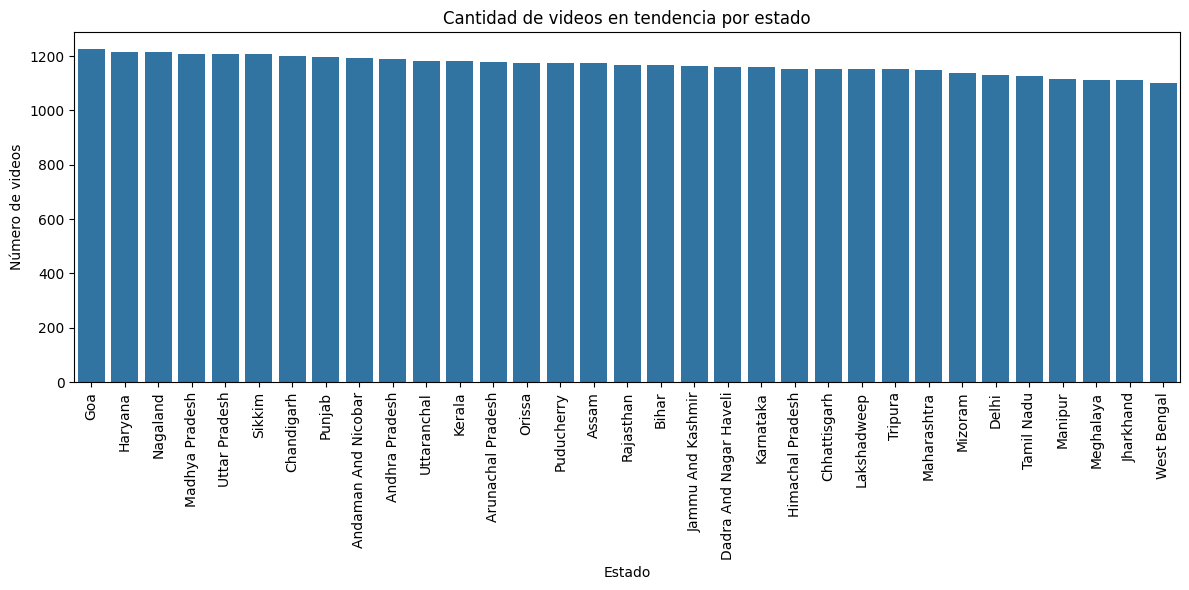

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de videos en tendencia por estado')
plt.xlabel('Estado')
plt.ylabel('Número de videos')
plt.tight_layout()
plt.show()

## Limpieza de datos

In [14]:
# Eliminacion de duplicados
df = df.drop_duplicates()
# el resultado de la eliminacion es 577 datos duplicados

In [15]:
df.isnull().sum()

video_id                     5
trending_date              472
title                      550
channel_title              649
category_id                682
publish_time               695
tags                       707
views                      714
likes                      719
dislikes                   719
comment_count              719
thumbnail_link             719
comments_disabled          719
ratings_disabled           719
video_error_or_removed     719
description               1278
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

Para asegurar la calidad del análisis, se procederá a examinar los datos faltantes. En particular, se analizarán los valores ausentes en la columna likes. Para ello, se ha creado un nuevo DataFrame que contiene únicamente las filas donde esta columna presenta valores nulos o vacíos. Esto permitirá evaluar la magnitud del problema y tomar decisiones informadas sobre su tratamiento.

In [16]:
df_datosvacios = df[df['likes'].isna()]
df_datosvacios.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,மகாதேவன்,டி.டி.வி.தினகரன்,பாஸ்கரன்,சுதாகரன்,ராஜராஜன்,குலோத்துங்கன்,டாக்டர்.வெங்கடேஷ் என பலருமே இப்போது ரெய்டு வள...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,அவர் சேர்த்து வைத்த பணமே கண்டமாகி விட்டது.சசி...,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...,புனேயில் எம்பிஏ முடித்து விட்டு பெங்களூருவில்...,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
118,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
120,\n\nOneindia Tamil\nSubscribe for More Videos....,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe :https://www....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)


In [17]:
print(df_datosvacios.shape)
df_datosvacios.info()
df_datosvacios.isnull().sum()

(719, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 116 to 38480
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                714 non-null    object 
 1   trending_date           247 non-null    object 
 2   title                   169 non-null    object 
 3   channel_title           70 non-null     object 
 4   category_id             37 non-null     object 
 5   publish_time            24 non-null     object 
 6   tags                    12 non-null     object 
 7   views                   5 non-null      object 
 8   likes                   0 non-null      float64
 9   dislikes                0 non-null      float64
 10  comment_count           0 non-null      float64
 11  thumbnail_link          0 non-null      object 
 12  comments_disabled       0 non-null      object 
 13  ratings_disabled        0 non-null      object 
 14  video_error_or_removed  0 non-nul

video_id                    5
trending_date             472
title                     550
channel_title             649
category_id               682
publish_time              695
tags                      707
views                     714
likes                     719
dislikes                  719
comment_count             719
thumbnail_link            719
comments_disabled         719
ratings_disabled          719
video_error_or_removed    719
description               719
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64

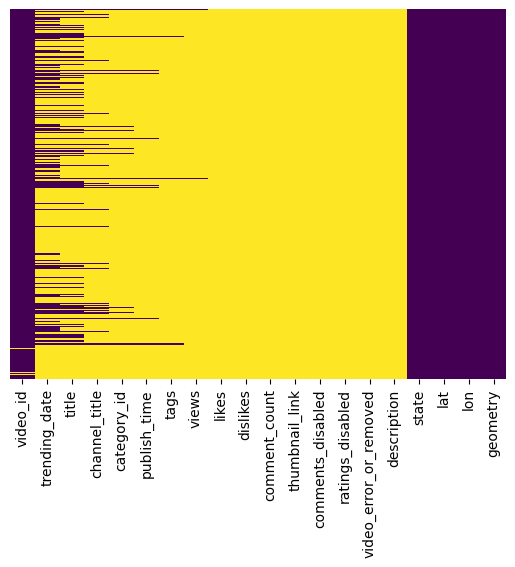

In [18]:
sns.heatmap(df_datosvacios.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Se identificaron 719 filas con valores faltantes en 'likes' (1.87% del total 38,533).
Además, en esas filas, 'video_id', 'trending_date' y 'category_id' contenían datos inconsistentes.
Por eso, se decidió eliminar estas filas para evitar distorsionar el análisis.

In [19]:
df = df.dropna(subset=['likes'])

In [20]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 37237 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                37237 non-null  object 
 1   trending_date           37237 non-null  object 
 2   title                   37237 non-null  object 
 3   channel_title           37237 non-null  object 
 4   category_id             37237 non-null  object 
 5   publish_time            37237 non-null  object 
 6   tags                    37237 non-null  object 
 7   views                   37237 non-null  object 
 8   likes                   37237 non-null  float64
 9   dislikes                37237 non-null  float64
 10  comment_count           37237 non-null  float64
 11  thumbnail_link          37237 non-null  object 
 12  comments_disabled       37237 non-null  object 
 13  ratings_disabled        37237 non-null  object 
 14  video_error_or_removed  37237 non-null  obj

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               559
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64

El DataFrame tiene 19 columnas sin valores vacíos. Solo la columna `description` presenta datos faltantes, esto puede ocurrir porque algunos videos no tienen descripción. Por ello lo completaremos con `Sin descripcion` a los datos vacios.


In [21]:
df['description'] = df['description'].fillna("Sin descripcion")

In [22]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64

A hora tenemos los datos sin vacios con un total de 37237, a continuacion se realizaran la rectificacion de los tipos de las variables de la columna

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37237 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                37237 non-null  object 
 1   trending_date           37237 non-null  object 
 2   title                   37237 non-null  object 
 3   channel_title           37237 non-null  object 
 4   category_id             37237 non-null  object 
 5   publish_time            37237 non-null  object 
 6   tags                    37237 non-null  object 
 7   views                   37237 non-null  object 
 8   likes                   37237 non-null  float64
 9   dislikes                37237 non-null  float64
 10  comment_count           37237 non-null  float64
 11  thumbnail_link          37237 non-null  object 
 12  comments_disabled       37237 non-null  object 
 13  ratings_disabled        37237 non-null  object 
 14  video_error_or_removed  37237 non-null  obj

In [24]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


Cambio del tipo de dato

In [25]:
# Convertir booleanos
df['comments_disabled'] = df['comments_disabled'].map({'VERDADERO': True, 'FALSO': False})
df['ratings_disabled'] = df['ratings_disabled'].map({'VERDADERO': True, 'FALSO': False})
df['video_error_or_removed'] = df['video_error_or_removed'].map({'VERDADERO': True, 'FALSO': False})


In [26]:
# Convertir fechas
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.tz_convert(None)

In [27]:
# Extraer fecha y hora
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour

In [28]:
# Convertir a int
df['views'] = df['views'].astype(int)
df['likes'] = df['likes'].astype(int)
df['dislikes'] = df['dislikes'].astype(int)
df['comment_count'] = df['comment_count'].astype(int)

In [29]:
# Realizaremos un mapeo de la columna Category_id con el json 

df['category_id'] = df['category_id'].astype(int) # Realizamos esto para eliminar posibles numeros que contenga (X.0)
df['category_id'] = df['category_id'].astype(str) # Regresamos a str para que pueda mapear con los datos del JSON
# Creamos un diccionario
category_dict = {item['id']: item['snippet']['title'] for item in categorias['items']}
# Mapeamos los ids a nombres de categorías
df['category_name'] = df['category_id'].map(category_dict)
# Convertimos a tipo 'category'
df['category_name'] = df['category_name'].astype('category')

In [30]:
# Realizaremos un mapeo de la columna Category_id con el json 

df['category_id'] = df['category_id'].astype(int) # Realizamos esto para eliminar posibles numeros que contenga (X.0)
df['category_id'] = df['category_id'].astype(str) # Regresamos a str para que pueda mapear con los datos del JSON
# Creamos un diccionario
category_dict = {item['id']: item['snippet']['title'] for item in categorias['items']}
# Mapeamos los ids a nombres de categorías
df['category_name'] = df['category_id'].map(category_dict)
# Convertimos a tipo 'category'
df['category_name'] = df['category_name'].astype('category')

In [31]:
# Crear ratios
df['like_dislike_ratio'] = np.where(df['dislikes'] != 0, df['likes'] / df['dislikes'],0)
df['views_comments_ratio'] = np.where(df['comment_count'] != 0,df['views'] / df['comment_count'], 0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37237 entries, 0 to 38532
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                37237 non-null  object        
 1   trending_date           37237 non-null  datetime64[ns]
 2   title                   37237 non-null  object        
 3   channel_title           37237 non-null  object        
 4   category_id             37237 non-null  object        
 5   publish_time            37237 non-null  datetime64[ns]
 6   tags                    37237 non-null  object        
 7   views                   37237 non-null  int64         
 8   likes                   37237 non-null  int64         
 9   dislikes                37237 non-null  int64         
 10  comment_count           37237 non-null  int64         
 11  thumbnail_link          37237 non-null  object        
 12  comments_disabled       37237 non-null  bool       

In [33]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,state,lat,lon,geometry,publish_date,publish_hour,category_name,like_dislike_ratio,views_comments_ratio
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),2017-11-12,12,Film & Animation,42.563910,1243.001134
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),2017-11-13,5,News & Politics,0.813053,0.000000


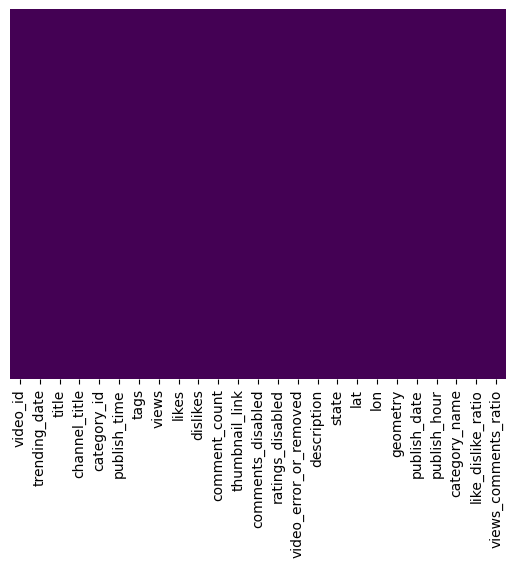

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [35]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
publish_date              0
publish_hour              0
category_name             0
like_dislike_ratio        0
views_comments_ratio      0
dtype: int64

Tenemos listo el df, procedemos a guardar los datos a limpio

In [36]:
# Descomenta la siguiente línea para exportar el DataFrame limpio a un archivo CSV
df.to_csv('../data/INvideos_cc50_202101_LIMPIO.csv', index=False)


In [37]:
# Descomenta la siguiente línea si deseas comenzar con el archivo nuevo.
# Nota: Tendrás que volver a ajustar los tipos de datos después de cargarlo.
#df= pd.read_csv('INvideos_cc50_202101_LIMPIO.csv')

---
REQUERIMIENTOS

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37237 entries, 0 to 38532
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                37237 non-null  object        
 1   trending_date           37237 non-null  datetime64[ns]
 2   title                   37237 non-null  object        
 3   channel_title           37237 non-null  object        
 4   category_id             37237 non-null  object        
 5   publish_time            37237 non-null  datetime64[ns]
 6   tags                    37237 non-null  object        
 7   views                   37237 non-null  int64         
 8   likes                   37237 non-null  int64         
 9   dislikes                37237 non-null  int64         
 10  comment_count           37237 non-null  int64         
 11  thumbnail_link          37237 non-null  object        
 12  comments_disabled       37237 non-null  bool       

### 1.	¿Qué categorías de videos son las de mayor tendencia?

C:\Users\smith\AppData\Local\Temp\ipykernel_19848\453349754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax =  sns.barplot(data=tendencias_categoria, x='count', y='category_name', palette='cividis')


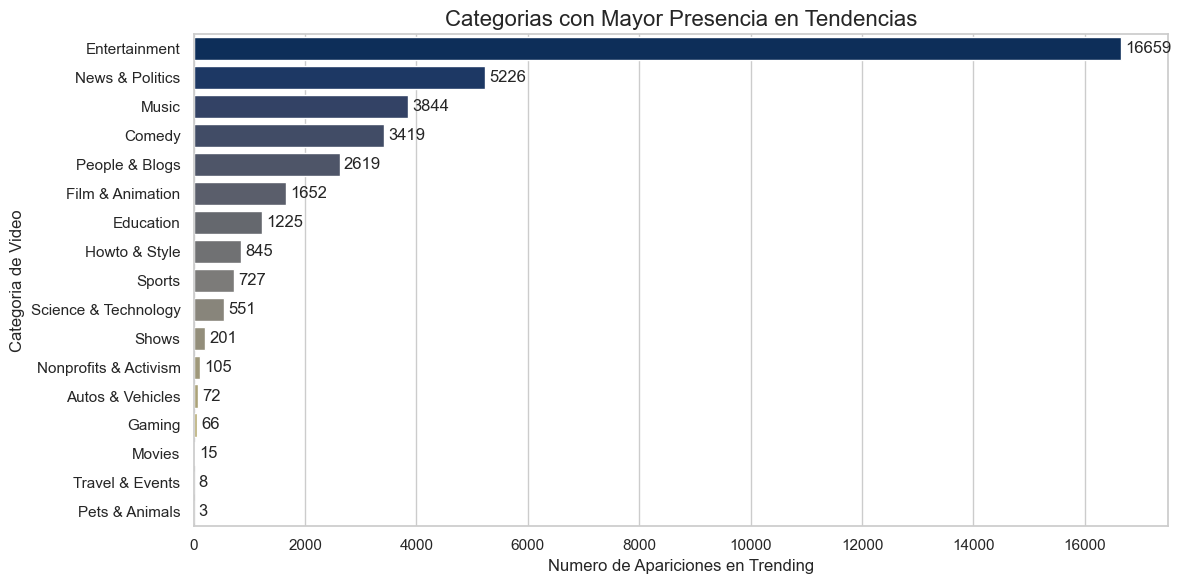

In [39]:
tendencias_categoria = df['category_name'].value_counts().reset_index()
tendencias_categoria ['category_name'] = tendencias_categoria ['category_name'].astype('string') #Cambio necesario para mostrar en orden descenso el grafico
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
ax =  sns.barplot(data=tendencias_categoria, x='count', y='category_name', palette='cividis')

# Agregar etiquetas al final de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


plt.title('Categorias con Mayor Presencia en Tendencias', fontsize=16)
plt.xlabel('Numero de Apariciones en Trending', fontsize=12)
plt.ylabel('Categoria de Video', fontsize=12)

plt.tight_layout()
plt.show()

In [40]:
tendencias_categoria 

,category_name,count
0,Entertainment,16659
1,News & Politics,5226
2,Music,3844
3,Comedy,3419
4,People & Blogs,2619
5,Film & Animation,1652
6,Education,1225
7,Howto & Style,845
8,Sports,727
9,Science & Technology,551


El gráfico evidencia cuáles son las categorías que más veces han estado en tendencia en YouTube India. Se nota que Entertainment News & Politics y Music  destacan por encima del resto, lo que refleja una clara inclinación del público hacia contenidos de entretenimiento y temas actuales.

Este tipo de información puede ser muy útil para que las marcas enfoquen sus campañas en estos géneros, ya que son los que generan mayor visibilidad y conexión con la audiencia.

### 2.	¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

C:\Users\smith\AppData\Local\Temp\ipykernel_19848\3520025572.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  likes_promedio = df.groupby('category_name')['likes'].mean().reset_index()
C:\Users\smith\AppData\Local\Temp\ipykernel_19848\3520025572.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


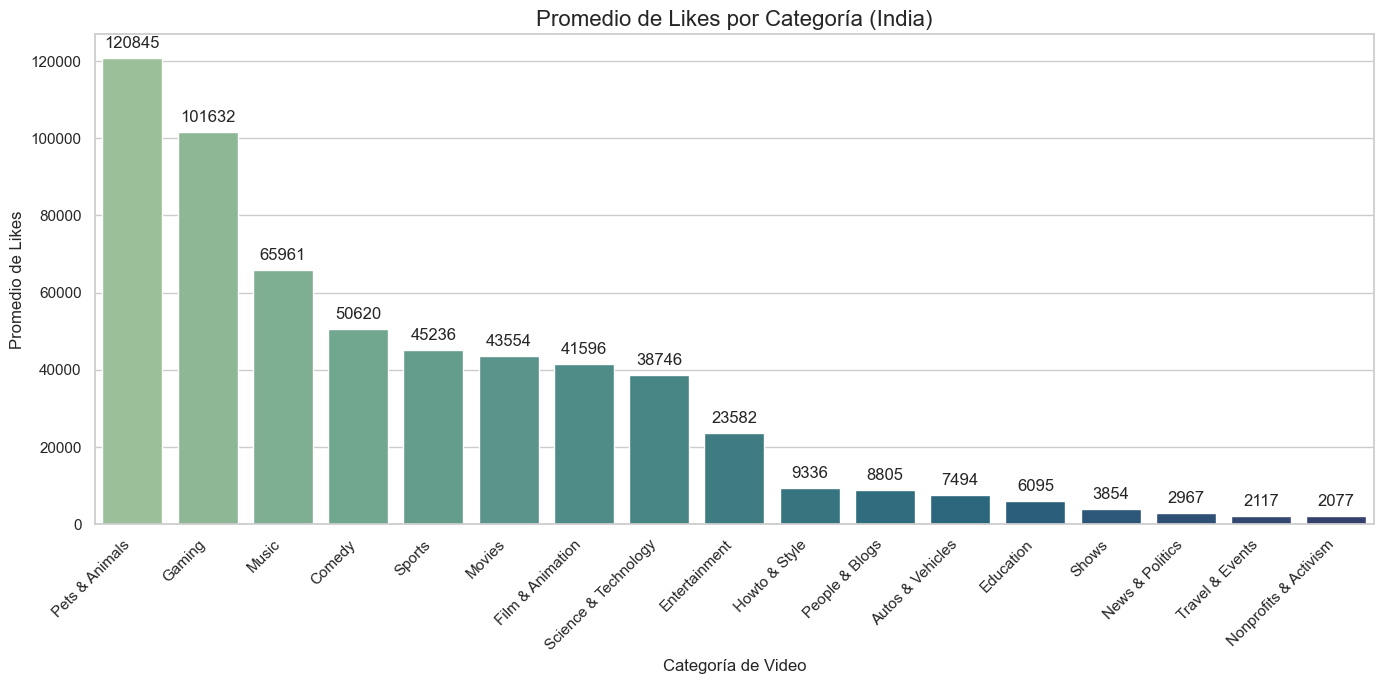

In [41]:
sns.set_theme(style="whitegrid")

# Calcular promedio de likes por categoría y ordenar de mayor a menor
likes_promedio = df.groupby('category_name')['likes'].mean().reset_index()
likes_promedio = likes_promedio.sort_values(by='likes', ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=likes_promedio,
    x='category_name',
    y='likes',
    palette='crest',
    order=likes_promedio['category_name'] 
)

# Numeros encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

plt.title('Promedio de Likes por Categoría (India)', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=12)
plt.ylabel('Promedio de Likes', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [42]:
likes_promedio

,category_name,likes
12,Pets & Animals,120844.666667
5,Gaming,101632.242424
8,Music,65961.043444
1,Comedy,50619.791167
15,Sports,45235.876204
7,Movies,43554.333333
4,Film & Animation,41595.598063
13,Science & Technology,38746.036298
3,Entertainment,23581.889369
6,Howto & Style,9336.343195


En este análisis se ve claramente que Gaming, Science & Technology y Music son las categorías que, en promedio, reciben más “Me gusta” por video. Esto sugiere que estos tipos de contenido conectan bastante con la audiencia, generando una buena cantidad de reacciones positivas.

Por otro lado, hay categorías con un promedio de likes más bajo, lo cual puede indicar que, aunque tengan muchas vistas, no siempre despiertan el mismo nivel de entusiasmo en quienes los ven.

¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”? 

C:\Users\smith\AppData\Local\Temp\ipykernel_19848\1371887050.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_promedio = df.groupby('category_name')['like_dislike_ratio'].mean().reset_index()
C:\Users\smith\AppData\Local\Temp\ipykernel_19848\1371887050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


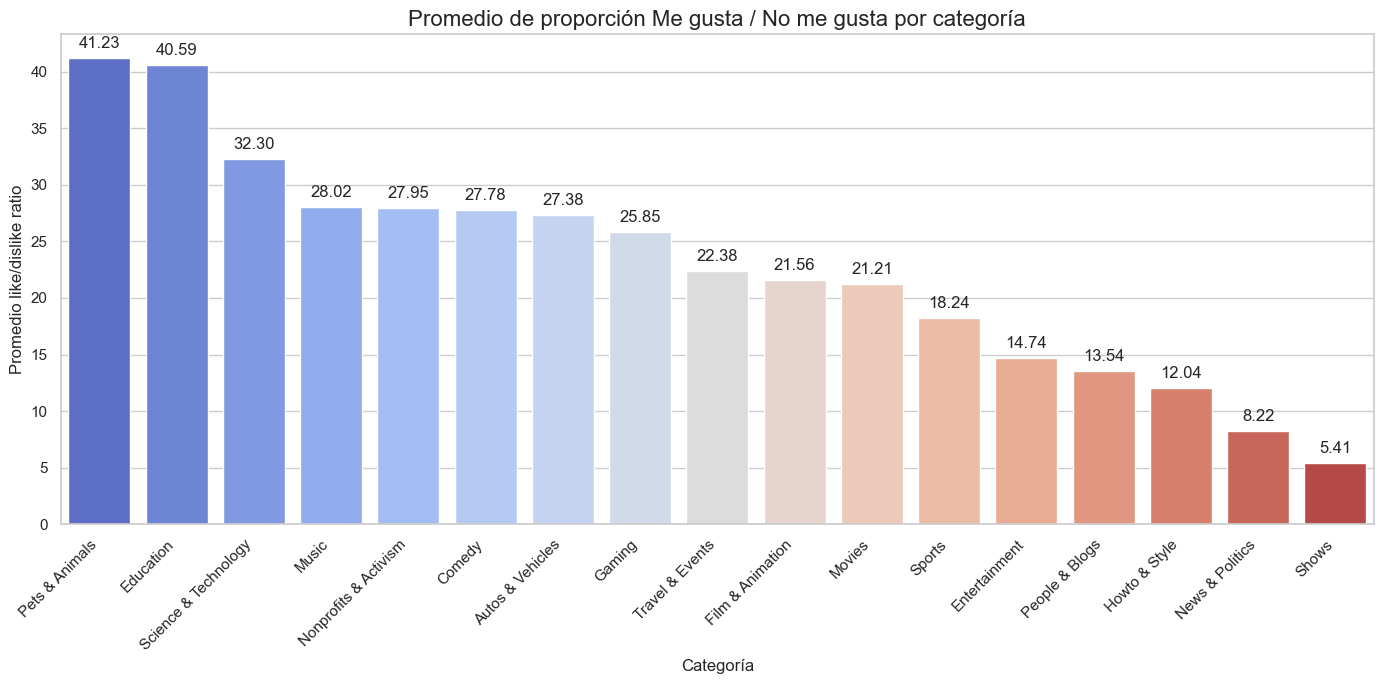

In [43]:
# Calcular promedio del ratio like/dislike por categoria y ordenar de mayor a menor
ratio_promedio = df.groupby('category_name')['like_dislike_ratio'].mean().reset_index()
ratio_promedio = ratio_promedio.sort_values(by='like_dislike_ratio', ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=ratio_promedio,
    x='category_name',
    y='like_dislike_ratio',
    palette='coolwarm',
    order=ratio_promedio['category_name']  
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

plt.title('Promedio de proporción Me gusta / No me gusta por categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Promedio like/dislike ratio', fontsize=12)

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [44]:
ratio_promedio

,category_name,like_dislike_ratio
12,Pets & Animals,41.228948
2,Education,40.585495
13,Science & Technology,32.299062
8,Music,28.022064
10,Nonprofits & Activism,27.951171
1,Comedy,27.779991
0,Autos & Vehicles,27.375888
5,Gaming,25.850035
16,Travel & Events,22.376107
4,Film & Animation,21.562738


Las categorías de videos con mejor proporción de “Me gusta” frente a “No me gusta” son Pets & Animals (41.23) y Education (40.59) , lo que indica que estos contenidos generan una respuesta muy positiva del público. En cambio, las categorías con la peor proporción son News & Politics (8.22) y Shows (5.41), lo que sugiere que estos temas tienden a recibir más rechazo o generan mayor controversia entre los usuarios.

4 ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”? 

C:\Users\smith\AppData\Local\Temp\ipykernel_19848\756418687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_vc_promedio = df.groupby('category_name')['views_comments_ratio'].mean().reset_index()
C:\Users\smith\AppData\Local\Temp\ipykernel_19848\756418687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


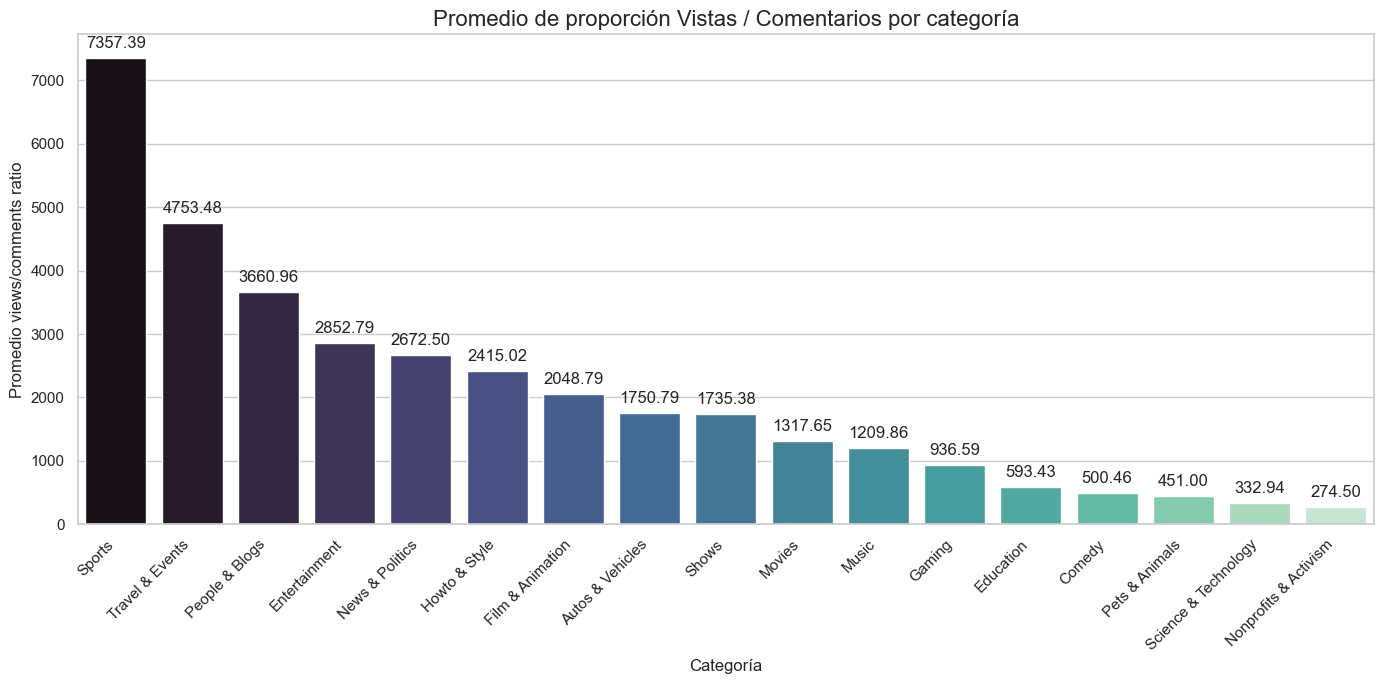

In [45]:
# Calcular promedio del ratio views/comments por categoria y ordenar de mayor a menor
ratio_vc_promedio = df.groupby('category_name')['views_comments_ratio'].mean().reset_index()
ratio_vc_promedio = ratio_vc_promedio.sort_values(by='views_comments_ratio', ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=ratio_vc_promedio,
    x='category_name',
    y='views_comments_ratio',
    palette='mako',
    order=ratio_vc_promedio['category_name'] 
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)


plt.title('Promedio de proporción Vistas / Comentarios por categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Promedio views/comments ratio', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Las categorías de videos con la mejor proporción de vistas por comentario son Sports (7357.39), Travel & Events (4753.48) y People & Blogs (3660.96). Esto indica que estos tipos de contenido reciben muchas visualizaciones, pero pocos comentarios en proporción, lo cual puede reflejar que generan más consumo pasivo o menos interacción directa del público.

5.	¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

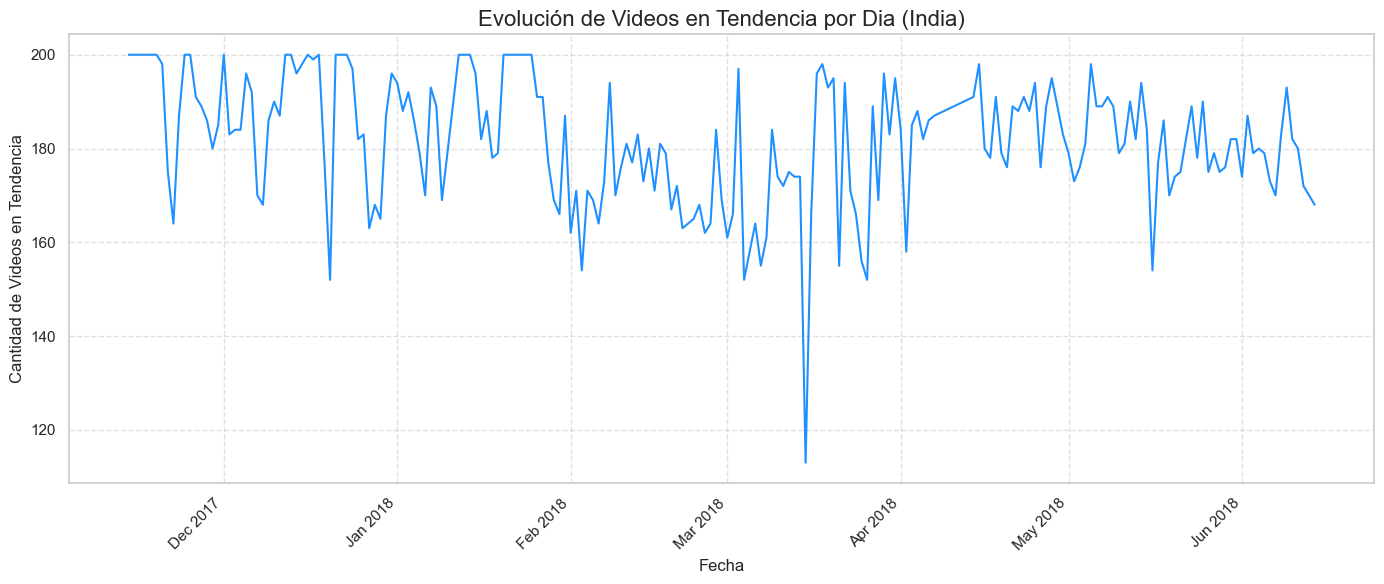

In [46]:
# Contar la cantidad de videos en tendencia por dia
tendencia_por_fecha = df['trending_date'].value_counts().sort_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))
plt.plot(tendencia_por_fecha.index, tendencia_por_fecha.values, color='dodgerblue')

plt.title('Evolución de Videos en Tendencia por Dia (India)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Videos en Tendencia', fontsize=12)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [47]:
tendencia_por_fecha

trending_date
2017-11-14    200
2017-11-15    200
2017-11-16    200
2017-11-17    200
2017-11-18    200
             ... 
2018-06-10    182
2018-06-11    180
2018-06-12    172
2018-06-13    170
2018-06-14    168
Name: count, Length: 205, dtype: int64

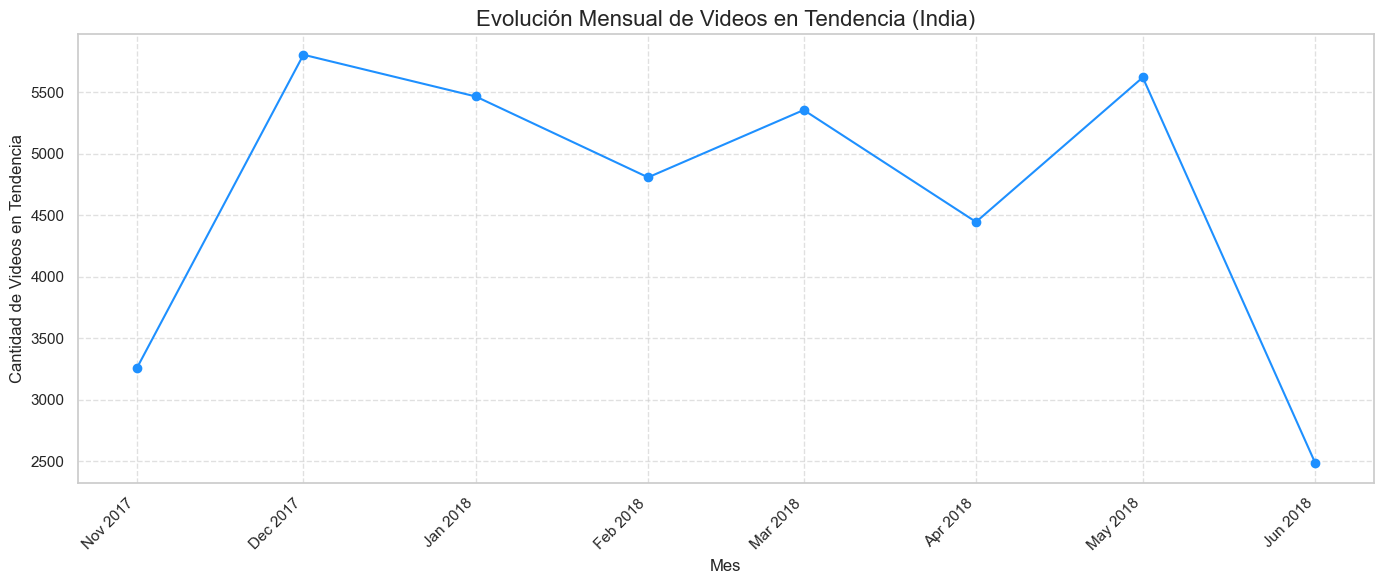

In [48]:
# Por mes
# Agrupar por mes y contar videos en tendencia
df['month'] = df['trending_date'].dt.to_period('M').dt.to_timestamp()
tendencia_mensual = df['month'].value_counts().sort_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))
plt.plot(tendencia_mensual.index, tendencia_mensual.values, marker='o', color='dodgerblue')

plt.title('Evolución Mensual de Videos en Tendencia (India)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Videos en Tendencia', fontsize=12)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [49]:
tendencia_mensual

month
2017-11-01    3255
2017-12-01    5803
2018-01-01    5464
2018-02-01    4807
2018-03-01    5354
2018-04-01    4445
2018-05-01    5619
2018-06-01    2490
Name: count, dtype: int64

El volumen mensual de videos en tendencia muestra fluctuaciones entre noviembre de 2017 y junio de 2018, con un pico en diciembre (5,803 videos) y una caída notable en junio (2,490 videos). Los datos de los meses extremos corresponden a períodos parciales, ya que la serie inicia el 14 de noviembre y termina el 14 de junio. 

A nivel diario, el 15 de marzo de 2018 fue el día con menor cantidad de videos en tendencia (113). Estas variaciones podrían reflejar eventos estacionales, campañas virales o cambios en las preferencias de los usuarios.



6.	¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

C:\Users\smith\AppData\Local\Temp\ipykernel_19848\723010699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


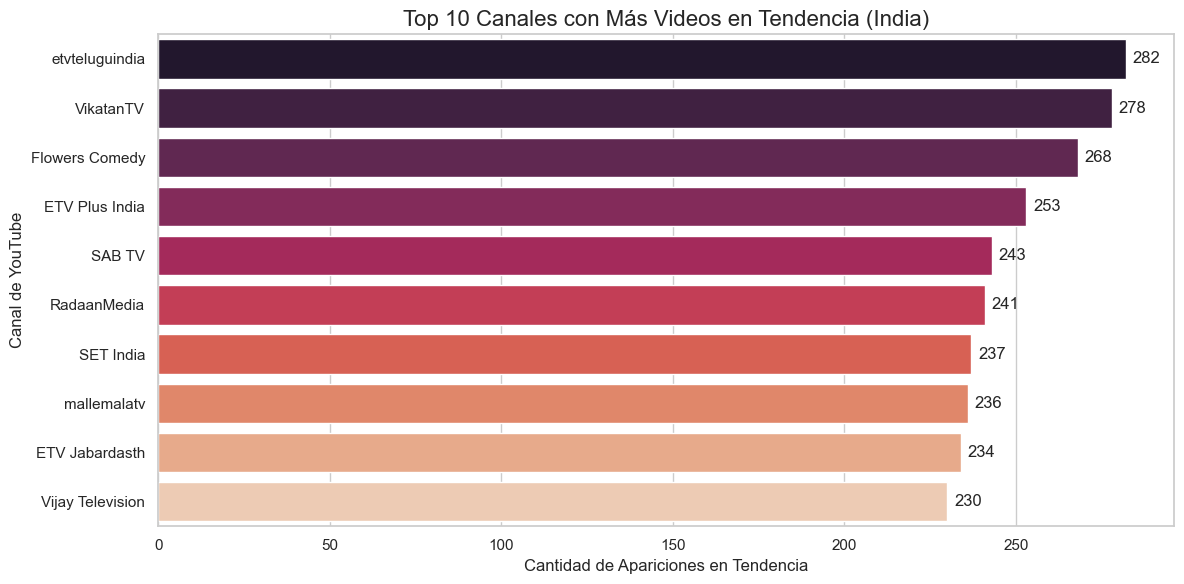

In [50]:
# Calcular frecuencia de aparición de canales
canales_frecuencia = df['channel_title'].value_counts().reset_index()
canales_frecuencia.columns = ['channel_title', 'apariciones']

# Top 10 canales ordenados de mayor a menor
top_canales = canales_frecuencia.head(10).sort_values(by='apariciones', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_canales,
    x='apariciones',
    y='channel_title',
    palette='rocket',
    order=top_canales['channel_title']  
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)

plt.title('Top 10 Canales con Más Videos en Tendencia (India)', fontsize=16)
plt.xlabel('Cantidad de Apariciones en Tendencia', fontsize=12)
plt.ylabel('Canal de YouTube', fontsize=12)

plt.tight_layout()
plt.show()

In [51]:
canales_unicos = canales_frecuencia[canales_frecuencia['apariciones'] == 1]
print(f"Cantidad de canales con solo 1 video en tendencia: {len(canales_unicos)}")

# Mostrarmos 10 canales ramdon que tienen solo 1 aparicion
bottom_canales = canales_unicos.sample(10)
print("\nEjemplos de canales que solo estuvieron una vez en tendencia:")
print(bottom_canales)

Cantidad de canales con solo 1 video en tendencia: 126

Ejemplos de canales que solo estuvieron una vez en tendencia:
                 channel_title  apariciones
1370            TehFuriousD TV            1
1311       Wide Angle Pictures            1
1366                   WowShow            1
1344         Sangeeta Gujarati            1
1329              Reporter Roy            1
1424  Nee Yaaruda Komali - NYK            1
1328            COMEDY SONOTEK            1
1332      Muksmedia Rajasthani            1
1301             Samachar Plus            1
1317           Relique Records            1


El análisis de las apariciones en tendencias muestra que ciertos canales dominan la frecuencia con la que sus videos se vuelven populares. En el top 10, canales como etvteluguindia (282 apariciones), VikatanTV (278) y Flowers Comedy (268) destacan como los más frecuentes en tendencia, reflejando una sólida presencia y posiblemente una gran audiencia y constancia en la generación de contenido viral. Por otro lado, existe una larga “cola” de canales que apenas logran aparecer en tendencia, con 126 canales que sólo han tenido un video en tendencia. Ejemplos de estos incluyen canales como RangeRIX, NYOOOZ TV y Techno Ruhez, que alcanzaron la popularidad de forma esporádica o puntual. Esto evidencia que mientras un pequeño grupo de canales mantiene una presencia constante en la lista de tendencias, la mayoría tiene una aparición limitada, lo que indica una alta concentración del contenido viral en unos pocos creadores destacados.

### 7 ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”? 

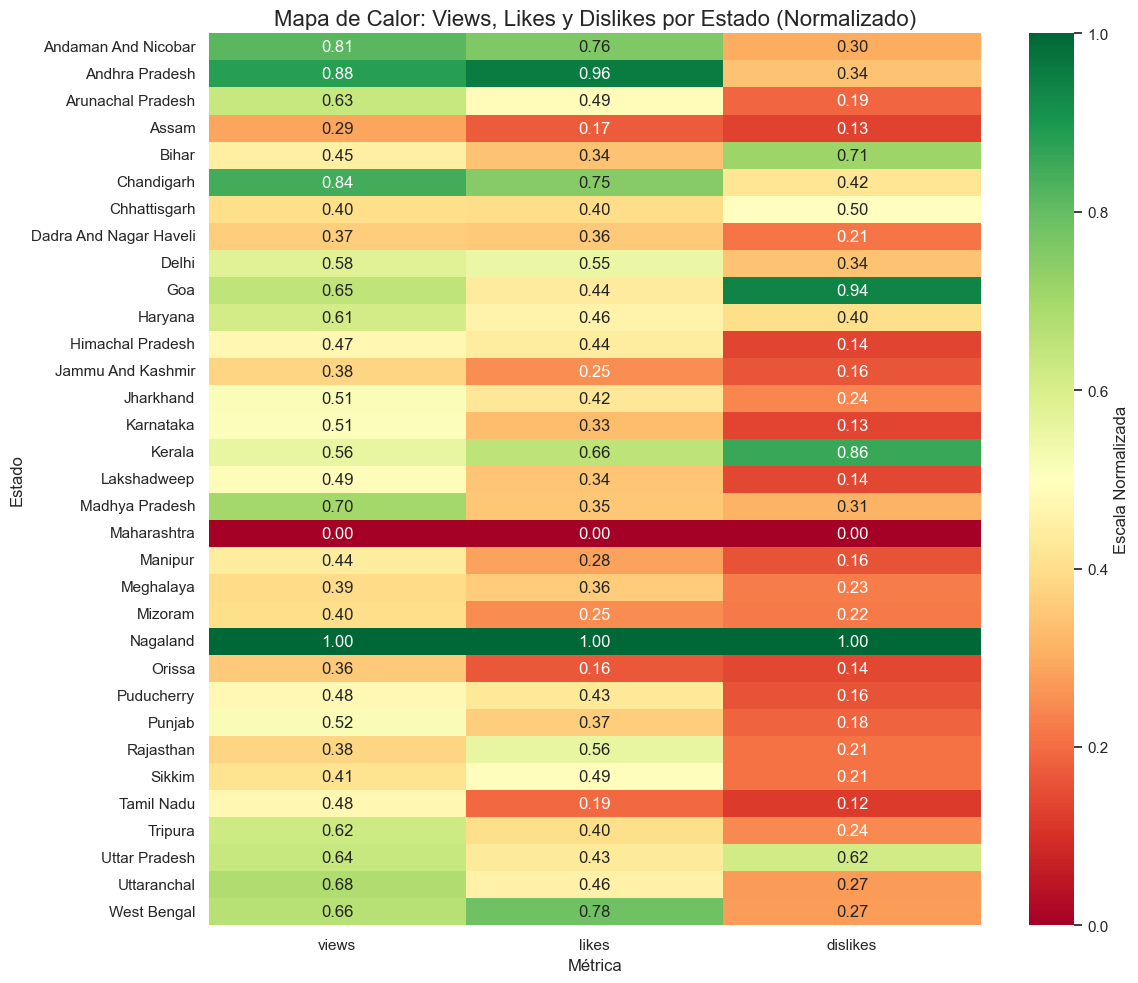

In [52]:
# Agrupar y sumar métricas por estado
estado_suma = df.groupby('state')[['views', 'likes', 'dislikes']].sum()

# Normalizar para mejor contraste en el mapa de calor
estado_suma_norm = (estado_suma - estado_suma.min()) / (estado_suma.max() - estado_suma.min())

# Crear mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(
    estado_suma_norm,
    annot=True,          
    fmt=".2f",
    cmap="RdYlGn",       
    cbar_kws={'label': 'Escala Normalizada'}
)

plt.title('Mapa de Calor: Views, Likes y Dislikes por Estado (Normalizado)', fontsize=16)
plt.ylabel('Estado')
plt.xlabel('Métrica')

plt.tight_layout()
plt.show()

In [53]:
estado_suma_norm

,views,likes,dislikes
state,,,
Andaman And Nicobar,0.813740,0.758841,0.299444
Andhra Pradesh,0.878983,0.957134,0.343714
Arunachal Pradesh,0.634294,0.489112,0.189734
Assam,0.287131,0.174544,0.132193
Bihar,0.446258,0.340950,0.712106
Chandigarh,0.844959,0.747473,0.418469
Chhattisgarh,0.398579,0.397677,0.499179
Dadra And Nagar Haveli,0.365982,0.358837,0.213200
Delhi,0.579420,0.548620,0.343204


In [54]:
estado_suma

,views,likes,dislikes
state,,,
Andaman And Nicobar,1344174624,35779669,1836352
Andhra Pradesh,1379301012,39114331,1927180
Arunachal Pradesh,1247562437,31243659,1611259
Assam,1060651961,25953622,1493200
Bihar,1146324559,28752045,2683014
Chandigarh,1360983156,35588495,2080556
Chhattisgarh,1120654901,29706019,2246150
Dadra And Nagar Haveli,1103104726,29052841,1659404
Delhi,1218018137,32244394,1926135


El análisis de los datos normalizados y reales revela que el estado de Nagaland registra el mayor número relativo de vistas, “me gusta” y “no me gusta” en comparación con los demás estados, con valores normalizados de 1.0 en las tres métricas. En términos absolutos, Nagaland también destaca con aproximadamente 1,444 millones de vistas, 39.8 millones de “me gusta” y 3.27 millones de “no me gusta”. Otros estados con altos valores relativos son Andhra Pradesh y Chandigarh, que muestran también cifras significativas tanto en vistas como en “me gusta”. Por otro lado, estados como Maharashtra presentan valores más bajos en todas las categorías. En general, los datos indican que la popularidad y la interacción con los videos varían notablemente entre estados, con ciertos estados del noreste y sur de India

### 8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben? 

Debido a que no contamos con el contenido de los comentarios para realizar un analisis de si son positivos, podemos inferir a traves de los datos de likes y comentarios con las vistas, para deducir y aproximarnos a encontrar la respuesta

In [55]:
correlacion =  df[['comment_count', 'likes', 'views']].corr()
correlacion

,comment_count,likes,views
comment_count,1.000000,0.780033,0.673702
likes,0.780033,1.000000,0.849780
views,0.673702,0.849780,1.000000


Definimos las variables independientes y dependientes

In [56]:
X = df['likes'].values.reshape(-1, 1)
y = df['comment_count'].values

In [57]:
# Modelo
reg = LinearRegression()
reg.fit(X, y)

# Predicciones
y_pred = reg.predict(X)

# Coeficientes
slope = reg.coef_[0]
intercept = reg.intercept_
r2 = r2_score(y, y_pred)

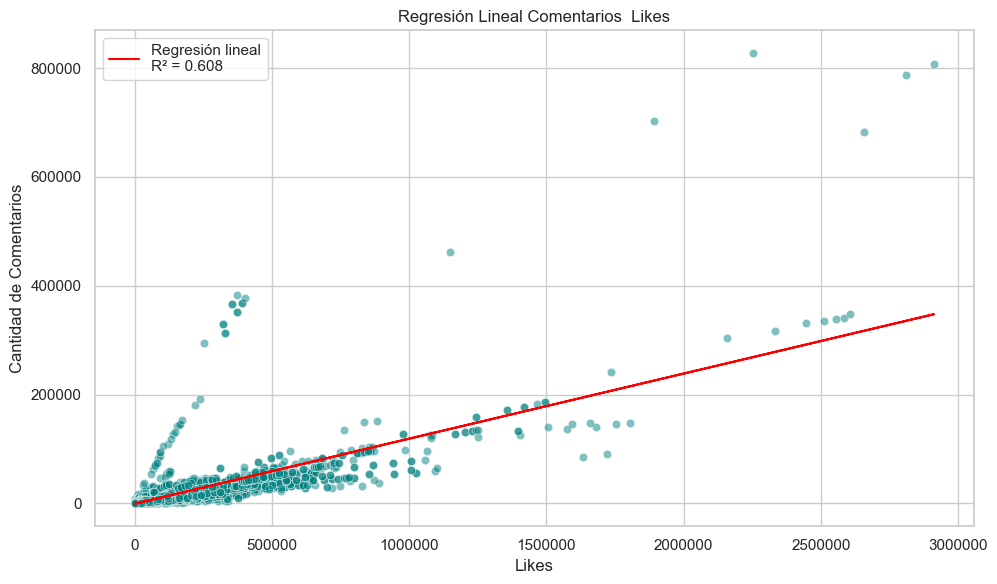

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['likes'], y=df['comment_count'], alpha=0.5, color='teal')
plt.plot(df['likes'], y_pred, color='red', label=f'Regresión lineal\nR² = {r2:.3f}')
plt.title('Regresión Lineal Comentarios  Likes')
plt.xlabel('Likes')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.tight_layout()

plt.ticklabel_format(style='plain')
plt.show()

Sí, existe una relación significativa entre la cantidad de likes y de comentarios que recibe un video en tendencia. Esto sugiere que los videos mejor valorados por la audiencia también generan más conversación, reforzando su posición como contenido popular.
El análisis de los datos permite afirmar que los videos en tendencia tienden a recibir una cantidad considerable de comentarios positivos.


---

### 9. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

In [59]:
columnas = ['views', 'likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio']
df[columnas].describe()

,views,likes,dislikes,comment_count,like_dislike_ratio,views_comments_ratio
count,3.723700e+04,3.723700e+04,3.723700e+04,37237.000000,37237.000000,3.723700e+04
mean,1.057353e+06,2.700585e+04,1.661336e+03,2671.095201,17.764372,2.410242e+03
std,3.179286e+06,9.701570e+04,1.609383e+04,14870.184128,22.697579,1.636756e+04
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.237150e+05,8.620000e+02,1.080000e+02,81.000000,4.857143,3.127778e+02
50%,3.039640e+05,3.058000e+03,3.250000e+02,329.000000,10.121294,9.009719e+02
75%,7.968380e+05,1.370200e+04,1.018000e+03,1280.000000,22.791111,2.255114e+03
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,928.000000,1.671204e+06


In [60]:
df[columnas].corr()

,views,likes,dislikes,comment_count,like_dislike_ratio,views_comments_ratio
views,1.000000,0.849780,0.543741,0.673702,0.083583,-0.015484
likes,0.849780,1.000000,0.494597,0.780033,0.205388,-0.030869
dislikes,0.543741,0.494597,1.000000,0.708170,-0.006863,-0.009562
comment_count,0.673702,0.780033,0.708170,1.000000,0.139644,-0.022171
like_dislike_ratio,0.083583,0.205388,-0.006863,0.139644,1.000000,-0.052721
views_comments_ratio,-0.015484,-0.030869,-0.009562,-0.022171,-0.052721,1.000000


In [61]:
muestra_columnas = ['views', 'likes', 'dislikes', 'comment_count', 'category_name', 'state', 'publish_hour']
df[muestra_columnas].head(5)

,views,likes,dislikes,comment_count,category_name,state,publish_hour
0,1096327,33966,798,882,Film & Animation,Arunachal Pradesh,12
1,590101,735,904,0,News & Politics,Arunachal Pradesh,5
2,473988,2011,243,149,Entertainment,Dadra And Nagar Haveli,15
3,1242680,70353,1624,2684,Comedy,Nagaland,7
4,464015,492,293,66,Entertainment,Himachal Pradesh,1


---

Para normalizar la variable `X`, se aplicó una transformación logarítmica mediante la función \(\log(1 + x)\), implementada en Python con `np.log1p`. 

Esta transformación es especialmente útil cuando las variables contienen valores cero o muy pequeños y, al mismo tiempo, tienen valores máximos muy grandes, ya que evita problemas numéricos y reduce la asimetría de la distribución de los datos. 

A diferencia de los métodos de escalado tradicionales (como Min-Max o StandardScaler), que únicamente modifican la escala, la transformación logarítmica modifica la forma de la distribución, comprimiendo valores grandes y expandiendo valores pequeños, facilitando así el entrenamiento de modelos predictivos.



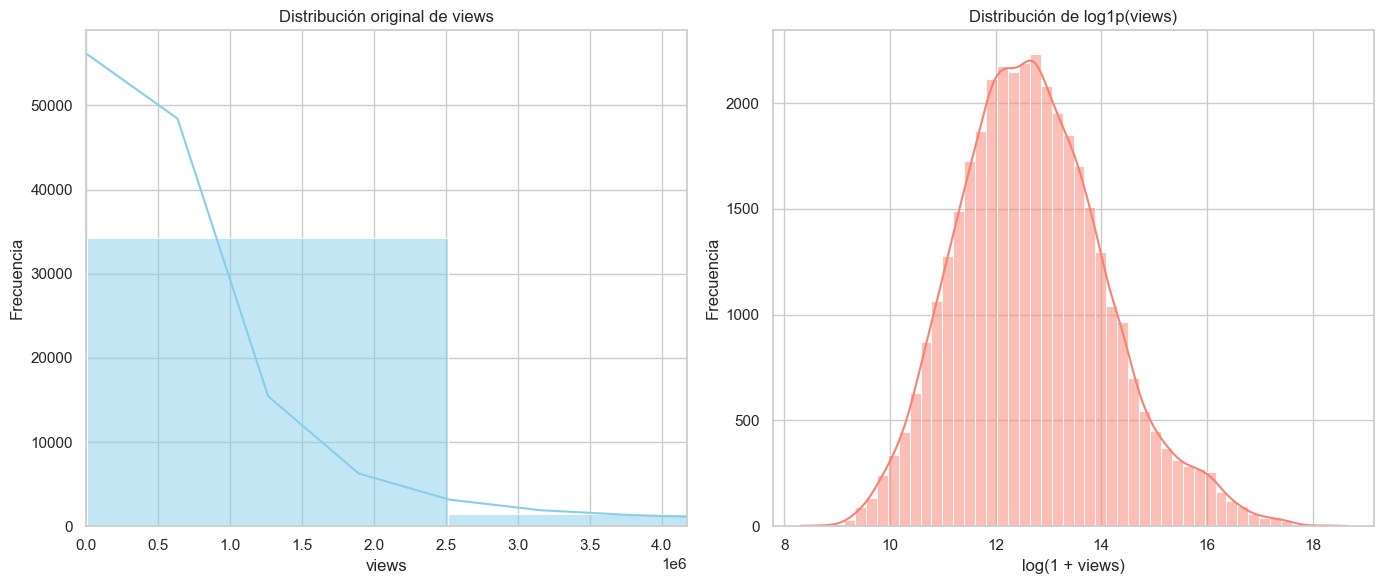

In [62]:
# Tamaño del gráfico
plt.figure(figsize=(14, 6))

# Histograma original de 'views'
plt.subplot(1, 2, 1)
sns.histplot(df['views'], bins=50, kde=True, color='skyblue')
plt.title('Distribución original de views')
plt.xlabel('views')
plt.ylabel('Frecuencia')
plt.xlim(0, df['views'].quantile(0.95))  

# Histograma transformado con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['views']), bins=50, kde=True, color='salmon')
plt.title('Distribución de log1p(views)')
plt.xlabel('log(1 + views)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

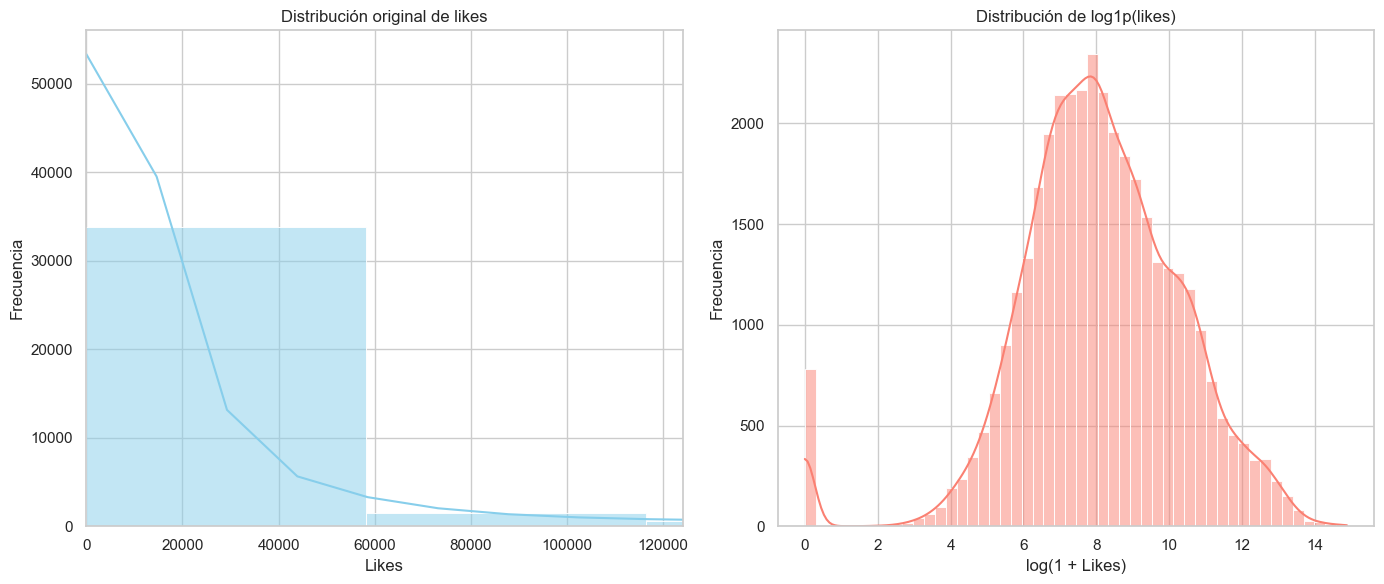

In [63]:
# Tamaño del gráfico
plt.figure(figsize=(14, 6))

# Histograma original de 'likes'
plt.subplot(1, 2, 1)
sns.histplot(df['likes'], bins=50, kde=True, color='skyblue')
plt.title('Distribución original de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.xlim(0, df['likes'].quantile(0.95))  

# Histograma transformado con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['likes']), bins=50, kde=True, color='salmon')
plt.title('Distribución de log1p(likes)')
plt.xlabel('log(1 + Likes)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

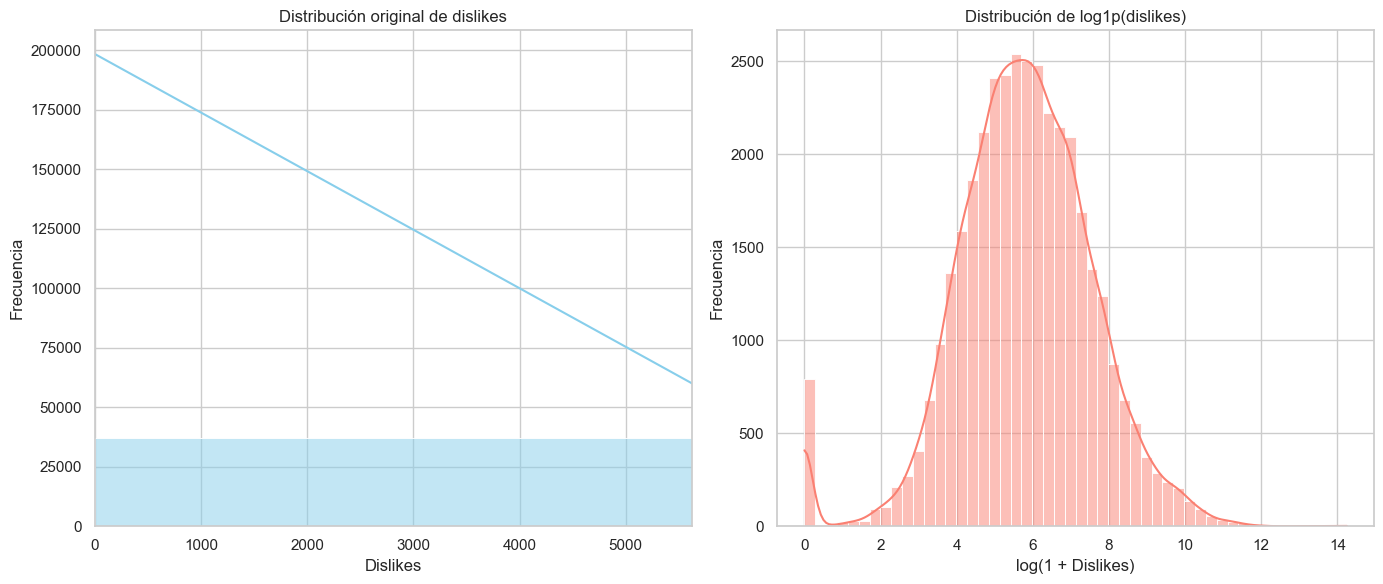

In [64]:
plt.figure(figsize=(14, 6))

# Histograma original de 'dislikes'
plt.subplot(1, 2, 1)
sns.histplot(df['dislikes'], bins=50, kde=True, color='skyblue')
plt.title('Distribución original de dislikes')
plt.xlabel('Dislikes')
plt.ylabel('Frecuencia')
plt.xlim(0, df['dislikes'].quantile(0.95))  

# Histograma transformado con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['dislikes']), bins=50, kde=True, color='salmon')
plt.title('Distribución de log1p(dislikes)')
plt.xlabel('log(1 + Dislikes)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

---
Vistas "View"

Modelado: 

Definimos las variables independientes y dependientes

In [65]:
num_features = ['likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio', 'publish_hour']
cat_features = ['category_name', 'state']

In [66]:
X = df[num_features + cat_features]
y = np.log1p(df['views'])

Dividimos el dataser en entrenamiento y prueba

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Codificacion de variables

In [68]:
#Codificacion de  variables categóricas con OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar encoder en train y transformar train y test
X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

In [69]:
#Extraer variables numéricas y convertir a numpy arrays
X_train_num = X_train[num_features].to_numpy()
X_test_num = X_test[num_features].to_numpy()

# Concatenar variables numéricas y categóricas
X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed = np.hstack([X_test_num, X_test_cat])

Entrenamiento y prediccion

In [70]:
# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=101)

model.fit(X_train_processed, y_train)

#Predecir sobre test
y_pred = model.predict(X_test_processed)

Evaluacion

In [71]:
# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f"R² en log_views: {r2:.4f}")

# Evaluar desempeño en log_views
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en log_views: {rmse:.4f}")

#Volver a escala original y calcular MAE
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
print(f"MAE en views: {mae:.0f} views")

R² en log_views: 0.9851
RMSE en log_views: 0.1715
MAE en views: 58277 views


Visualizacion

In [72]:
resultados_views = pd.DataFrame({
    'Real_log_views': y_test,
    'Predicho_log_views': y_pred,
    'Real_views': y_test_exp,
    'Predicho_views': y_pred_exp
})

resultados_views.head()

,Real_log_views,Predicho_log_views,Real_views,Predicho_views
30563,11.507873,11.530335,99495.0,101755.199581
24091,12.237881,12.340326,206463.0,228735.473256
27110,11.805879,11.814152,134037.0,135150.559810
4929,11.991945,11.958412,161448.0,156124.005665
7116,11.803339,11.815837,133697.0,135378.417076


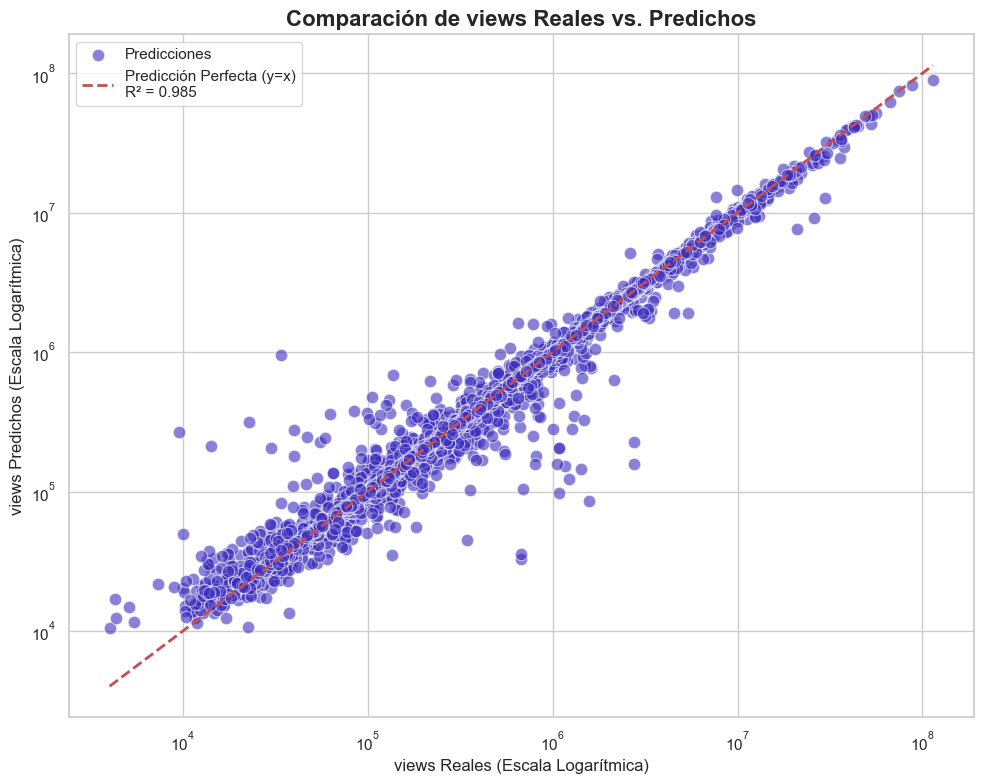

In [73]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=resultados_views,
    x='Real_views',
    y='Predicho_views',
    alpha=0.6,
    color="#3B2DBE", 
    edgecolor='w',
    s=80,
    label='Predicciones'
)

min_val = min(resultados_views['Real_views'].min(), resultados_views['Predicho_views'].min())
max_val = max(resultados_views['Real_views'].max(), resultados_views['Predicho_views'].max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',  # Estilo de línea
    lw=2,
    label=f'Predicción Perfecta (y=x)\nR² = {r2:.3f}'  
)

# escala logarítmica
plt.xscale('log')
plt.yscale('log')


plt.title('Comparación de views Reales vs. Predichos', fontsize=16, weight='bold')
plt.xlabel('views Reales (Escala Logarítmica)', fontsize=12)
plt.ylabel('views Predichos (Escala Logarítmica)', fontsize=12)


plt.legend(fontsize=11)


plt.tight_layout()
plt.show()

---
ME GUSTAS "likes"

In [74]:
num_features = ['views', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio', 'publish_hour']
cat_features = ['category_name', 'state']

In [75]:
X = df[num_features + cat_features]
y = np.log1p(df['likes'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

In [78]:
X_train_num = X_train[num_features].to_numpy()
X_test_num = X_test[num_features].to_numpy()

X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed = np.hstack([X_test_num, X_test_cat])

In [79]:
model = RandomForestRegressor(n_estimators=100, random_state=101)

model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

In [80]:
# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f"R² en log_likes: {r2:.4f}")

# Evaluar desempeño en log_likes
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en log_likes: {rmse:.4f}")

#Volver a escala original y calcular MAE
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
print(f"MAE en likes: {mae:.0f} likes")


R² en log_likes: 0.9980
RMSE en log_likes: 0.1030
MAE en likes: 1655 likes


In [81]:
resultados_likes = pd.DataFrame({
    'Real_log_likes': y_test,
    'Predicho_log_likes': y_pred,
    'Real_likes': y_test_exp,
    'Predicho_likes': y_pred_exp
})

resultados_likes.head()

,Real_log_likes,Predicho_log_likes,Real_likes,Predicho_likes
30563,6.295266,6.316252,541.0,552.494863
24091,0.000000,0.000000,0.0,0.000000
27110,7.873978,7.897308,2627.0,2689.030791
4929,6.744059,6.738000,848.0,842.871301
7116,8.535819,8.527687,5093.0,5051.745395


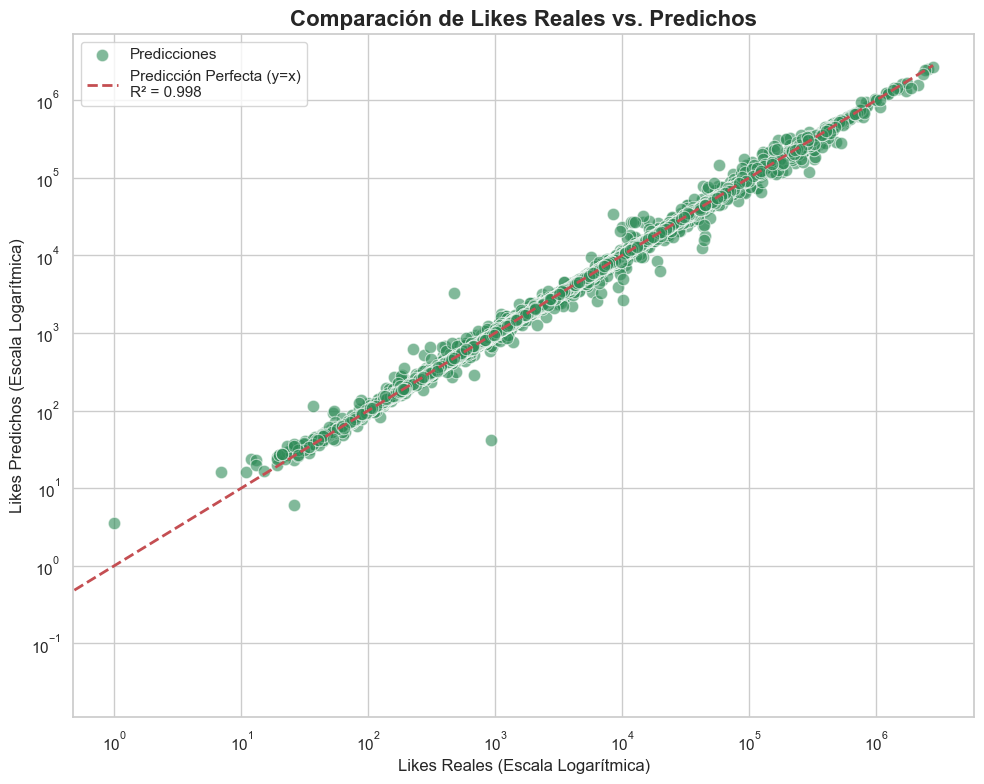

In [82]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=resultados_likes,
    x='Real_likes',
    y='Predicho_likes',
    alpha=0.6,
    color="#2E8B57",  
    edgecolor='w',
    s=80,
    label='Predicciones'
)


min_val = min(resultados_likes['Real_likes'].min(), resultados_likes['Predicho_likes'].min())
max_val = max(resultados_likes['Real_likes'].max(), resultados_likes['Predicho_likes'].max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',  
    lw=2,
    label=f'Predicción Perfecta (y=x)\nR² = {r2:.3f}' 
)


plt.xscale('log')
plt.yscale('log')


plt.title('Comparación de Likes Reales vs. Predichos', fontsize=16, weight='bold')
plt.xlabel('Likes Reales (Escala Logarítmica)', fontsize=12)
plt.ylabel('Likes Predichos (Escala Logarítmica)', fontsize=12)


plt.legend(fontsize=11)

plt.tight_layout()

plt.show()

---
NO ME GUSTAS "dislikes"

In [83]:
num_features = ['views', 'likes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio', 'publish_hour']
cat_features = ['category_name', 'state']

In [84]:
X = df[num_features + cat_features]
y = np.log1p(df['dislikes'])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

X_train_num = X_train[num_features].to_numpy()
X_test_num = X_test[num_features].to_numpy()

X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed = np.hstack([X_test_num, X_test_cat])

In [87]:
model = RandomForestRegressor(n_estimators=100, random_state=101)

model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

In [88]:
# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f"R² en log_dislikes: {r2:.4f}")

# Evaluar desempeño en log_dislikes
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en log_dislikes: {rmse:.4f}")

#Volver a escala original y calcular MAE
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
print(f"MAE en dislikes: {mae:.0f} dislikes")

R² en log_dislikes: 0.9980
RMSE en log_dislikes: 0.0823
MAE en dislikes: 96 dislikes


In [89]:
resultados_dislikes = pd.DataFrame({
    'Real_log_dislikes': y_test,
    'Predicho_log_dislikes': y_pred,
    'Real_dislikes': y_test_exp,
    'Predicho_dislikes': y_pred_exp
})

resultados_dislikes.head()

,Real_log_dislikes,Predicho_log_dislikes,Real_dislikes,Predicho_dislikes
30563,3.610918,3.611281,36.0,36.013428
24091,0.000000,0.000000,0.0,0.000000
27110,5.030438,5.164026,152.0,173.866969
4929,4.912655,4.910155,135.0,134.660475
7116,5.176150,5.141351,176.0,169.946630


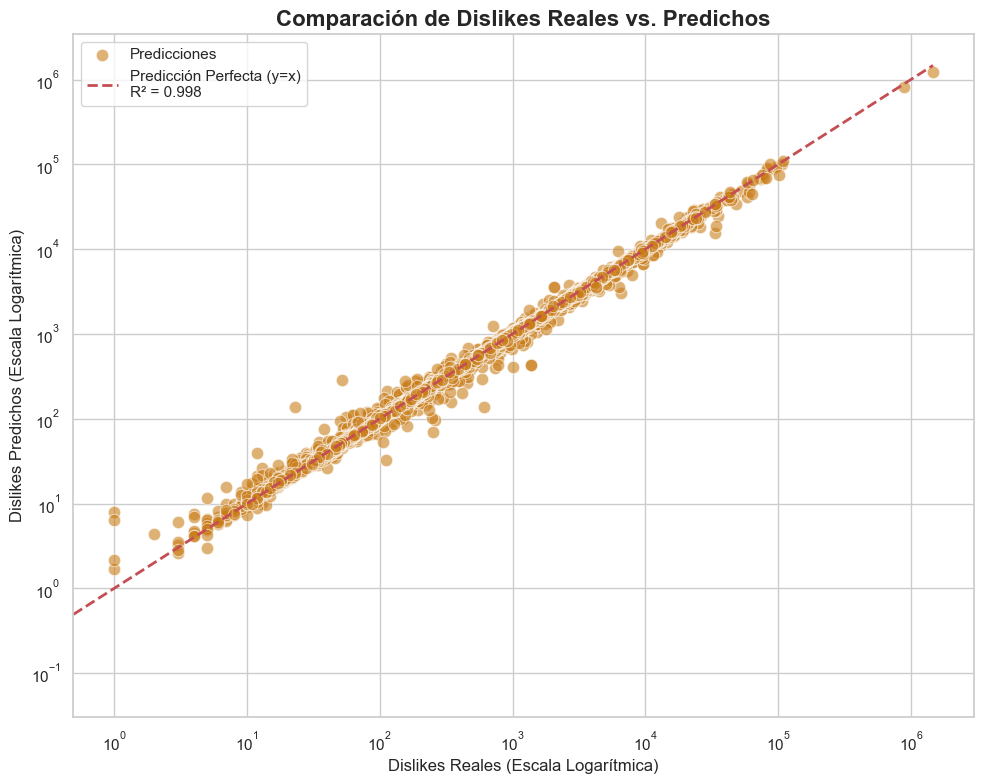

In [90]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=resultados_dislikes,
    x='Real_dislikes',
    y='Predicho_dislikes',
    alpha=0.6,
    color="#C97D19",  
    edgecolor='w',
    s=80,
    label='Predicciones'
)


min_val = min(resultados_dislikes['Real_dislikes'].min(), resultados_dislikes['Predicho_dislikes'].min())
max_val = max(resultados_dislikes['Real_dislikes'].max(), resultados_dislikes['Predicho_dislikes'].max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',  
    lw=2,
    label=f'Predicción Perfecta (y=x)\nR² = {r2:.3f}' 
)


plt.xscale('log')
plt.yscale('log')


plt.title('Comparación de Dislikes Reales vs. Predichos', fontsize=16, weight='bold')
plt.xlabel('Dislikes Reales (Escala Logarítmica)', fontsize=12)
plt.ylabel('Dislikes Predichos (Escala Logarítmica)', fontsize=12)


plt.legend(fontsize=11)

plt.tight_layout()

plt.show()